In [40]:
using Plots
using Printf
using LinearAlgebra

In [41]:
A = [0 4; 1 0]
A

2×2 Matrix{Int64}:
 0  4
 1  0

In [42]:
ql =[0, 1]
qr = [1, 0]
qr

2-element Vector{Int64}:
 1
 0

In [43]:
eigvals(A)

2-element Vector{Float64}:
 -1.9999999999999996
  2.0000000000000004

In [44]:
eigvecs(A)

2×2 Matrix{Float64}:
 -0.894427  0.894427
  0.447214  0.447214

In [45]:
λ, v = eigen(A)
λ

2-element Vector{Float64}:
 -1.9999999999999996
  2.0000000000000004

In [46]:
v

2×2 Matrix{Float64}:
 -0.894427  0.894427
  0.447214  0.447214

In [47]:
vi = inv(v)
vi

2×2 Matrix{Float64}:
 -0.559017  1.11803
  0.559017  1.11803

In [48]:
vi * ql

2-element Vector{Float64}:
 1.118033988749895
 1.1180339887498947

In [49]:
vi * qr

2-element Vector{Float64}:
 -0.5590169943749472
  0.5590169943749476

In [130]:
function rieman_solver(A, ql, qr, x, t; verbose=false)
    λ, v = eigen(A)
    vi = inv(v)

    wl = vi * ql
    wr = vi * qr

    p = 0

    for i in 1:length(λ)
        if x - λ[i]*t > 0
            p = i
        end
    end

    if verbose 
        @printf "l = %s\n" λ
        @printf "p = %s\n" p
        if p > 0   
            @printf "l[p] = %s\n" λ[p]
        end
        @printf "wl = %s\n" wl
        @printf "wr = %s\n" wr
        @printf "v = %s\n" v
     end
    
    w = zeros(length(λ))
    
    for i in 1:p
        w += wr[i] * v[:, i]
    end 

    if verbose
        @printf "w = %s\n" w
    end


    for i in p+1:length(λ)
        w += wl[i] * v[:, i]
    end
    
    if verbose
        @printf "w = %s\n" w
    end
    

    return  w
end



rieman_solver (generic function with 1 method)

In [131]:
rieman_solver([1 0; 0 -1], [0, 1], [1, 0], -1.5, 1; verbose=true)

l = [-1.0, 1.0]
p = 0
wl = [1.0, 0.0]
wr = [0.0, 1.0]
v = [0.0 1.0; 1.0 0.0]
w = [0.0, 0.0]
w = [0.0, 1.0]


2-element Vector{Float64}:
 0.0
 1.0

In [51]:
rieman_solver(A, ql, qr, 0, 0.00001)

2-element Vector{Float64}:
 1.4999999999999998
 0.24999999999999978

In [133]:
function plot_solution(A, ql, qr, xmin, xmax, t) 
    x = range(xmin, stop=xmax, length=100)
    
    q = zeros(length(x), length(ql))
    q0 = zeros(length(x), length(ql))

    for i in 1:length(x)
        q0[i,:] = x[i] < 0 ? ql : qr
        q[i,:] = rieman_solver(A, ql, qr, x[i], t)
    end

    for i in 1:length(ql)
        t1 = plot(x, q0[:,i], label="qo_$i")
        plot!(x, q[:, i], label="qt_$i")
        display("Component i = $i")
        display(t1)
           
    end

end


plot_solution (generic function with 1 method)

"Component i = 1"

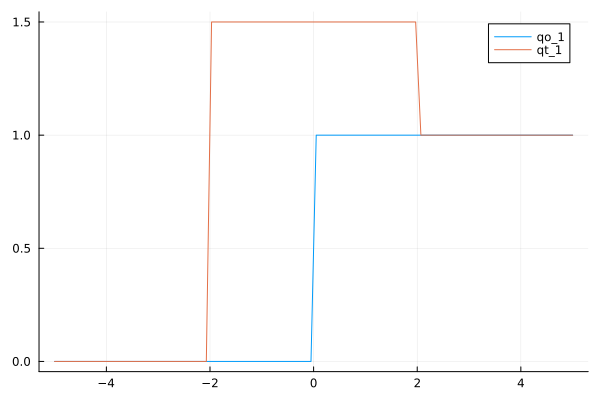

"Component i = 2"

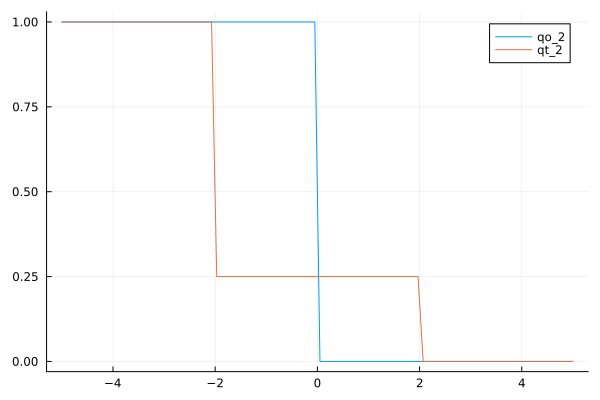

In [134]:
plot_solution(A, ql, qr, -5, 5, 1)

"Component i = 1"

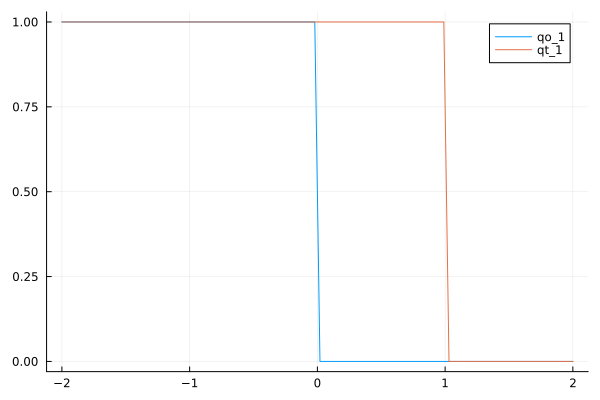

"Component i = 2"

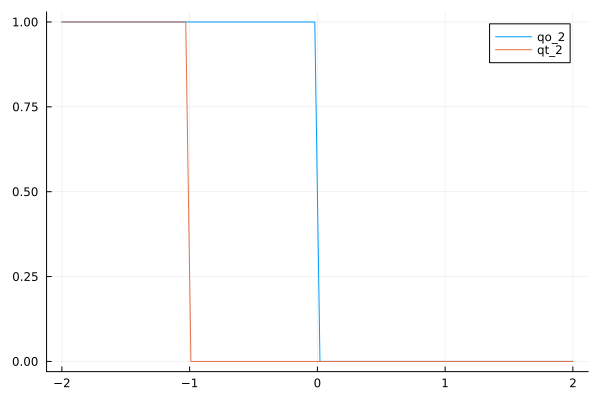

In [141]:
plot_solution([1 0;0 -1], [1,1], [0, 0], -2, 2, 1)

In [56]:
using Test
@test true

Test Passed

In [57]:
[1 0; 0 -1]

2×2 Matrix{Int64}:
 1   0
 0  -1

In [58]:
rieman_solver([1 0; 0 -1], [1, 0], [0, 1], 0.5, 1)

2-element Vector{Float64}:
 1.0
 1.0

In [59]:
rieman_solver([1 0; 0 -1], [1, 0], [0, 1], -0.5, 1)

2-element Vector{Float64}:
 1.0
 1.0

In [146]:
@testset "Riemann Solver tessts" begin
    @test true
    @testset "Initial Conditions are preserverd with t=0" begin
        @test rieman_solver(A, ql, qr, -1, 0) ≈ ql
        @test rieman_solver(A, ql, qr, 1, 0) ≈ qr
    end

    @testset "Advection with t=1" begin
        #=
        Riesoning: 
        The equations are independent. With the first component moving to the right with velocity 1 and the 
        second component moving to the left with velocity -1.

        The initial condition is going from 1 to 0 for both components. At times 1 the waves haven't reached the 
        points +- 1.5 so they are equal to the initial conditions. 

        At time 1 the waves reach the points +- 0.5.  the component with positive veolocy goes from 0 to 1 at point 0.5, 
        and the component with negative velocity goes from 1 to 0 at point -0.5. Both points are thus [1,0]
        =#
        @test rieman_solver([1 0; 0 -1], [1, 1], [0, 0], -1.5, 1) ≈ [1, 1]
        @test rieman_solver([1 0; 0 -1], [1, 1], [0, 0], -0.5, 1) ≈ [1, 0]
        @test rieman_solver([1 0; 0 -1], [1, 1], [0, 0], 1.5, 1) ≈ [0, 0]
        @test rieman_solver([1 0; 0 -1], [1, 1], [0, 0], 0.5, 1) ≈ [1, 0]
    end
end

Test Summary:         | Pass  Total  Time
Riemann Solver tessts |    7      7  0.0s


Test.DefaultTestSet("Riemann Solver tessts", Any[Test.DefaultTestSet("Initial Conditions are preserverd with t=0", Any[], 2, false, false, true, 1.741204891801e9, 1.741204891801e9, false, "a:\\Mathematics\\FVMHyper\\chapter3\\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X23sZmlsZQ==.jl"), Test.DefaultTestSet("Advection with t=1", Any[], 4, false, false, true, 1.741204891801e9, 1.741204891801e9, false, "a:\\Mathematics\\FVMHyper\\chapter3\\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X23sZmlsZQ==.jl")], 1, false, false, true, 1.741204891801e9, 1.741204891801e9, false, "a:\\Mathematics\\FVMHyper\\chapter3\\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X23sZmlsZQ==.jl")